In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import glob
import pickle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Activation
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import cv2 as cv
import random
import PIL

# Creating Folders

In [12]:
#1
file = r"C:\Users\user\Downloads\simpson.zip"
move_path = r"E:\works\python\simpson_character_recognition"

In [3]:
"""
!move {file} {move_path}
with zipfile.ZipFile((move_path+'\simpson.zip'),'r') as f:
    f.extractall(move_path)"""

"\n!move {file} {move_path}\nwith zipfile.ZipFile((move_path+'\\simpson.zip'),'r') as f:\n    f.extractall(move_path)"

In [13]:
img_size_x = 100
img_size_y = 100

In [14]:
paths = {
    'training_path':os.path.join(move_path,'simpsons_dataset'),
    'test_path':os.path.join(move_path,'kaggle_simpson_testset','kaggle_simpson_testset'),
    'variable_path':os.path.join(move_path,'variables'),
    'checkpoint_path':os.path.join(move_path,'checkpoint')
}

In [15]:
for path in paths.values():
    !mkdir {path}

A subdirectory or file E:\works\python\simpson_character_recognition\simpsons_dataset already exists.
A subdirectory or file E:\works\python\simpson_character_recognition\kaggle_simpson_testset\kaggle_simpson_testset already exists.
A subdirectory or file E:\works\python\simpson_character_recognition\variables already exists.
A subdirectory or file E:\works\python\simpson_character_recognition\checkpoint already exists.


In [16]:
#2
labels_train = os.listdir(paths['training_path'])

In [17]:
#3
labels_train

['abraham_grampa_simpson',
 'agnes_skinner',
 'apu_nahasapeemapetilon',
 'barney_gumble',
 'bart_simpson',
 'carl_carlson',
 'charles_montgomery_burns',
 'chief_wiggum',
 'cletus_spuckler',
 'comic_book_guy',
 'disco_stu',
 'edna_krabappel',
 'fat_tony',
 'gil',
 'groundskeeper_willie',
 'homer_simpson',
 'kent_brockman',
 'krusty_the_clown',
 'lenny_leonard',
 'lionel_hutz',
 'lisa_simpson',
 'maggie_simpson',
 'marge_simpson',
 'martin_prince',
 'mayor_quimby',
 'milhouse_van_houten',
 'miss_hoover',
 'moe_szyslak',
 'ned_flanders',
 'nelson_muntz',
 'otto_mann',
 'patty_bouvier',
 'principal_skinner',
 'professor_john_frink',
 'rainier_wolfcastle',
 'ralph_wiggum',
 'selma_bouvier',
 'sideshow_bob',
 'sideshow_mel',
 'snake_jailbird',
 'troy_mcclure',
 'waylon_smithers']

# Create DataFrame from Image Folder Names

In [18]:
#4
def create_df(labels,path):    
    df = pd.DataFrame()
    for label in labels:
        df1 = pd.DataFrame()
        label_path = os.path.join(path,label)
        if df.empty:
            df['loc'] = glob.glob(os.path.join(label_path,'*.jpg'))
            df['character'] = label
        else:
            df1['loc'] = glob.glob(os.path.join(label_path,'*.jpg'))
            df1['character'] = label
        df = pd.concat((df,df1),axis=0,ignore_index=True)
    return df

In [19]:
#5
df = create_df(labels_train,paths['training_path'])

In [20]:
#6
df['character_name'] = df['character'].replace({'_':' '},regex=True)
df

loc  \
0      E:\works\python\simpson_character_recognition\...   
1      E:\works\python\simpson_character_recognition\...   
2      E:\works\python\simpson_character_recognition\...   
3      E:\works\python\simpson_character_recognition\...   
4      E:\works\python\simpson_character_recognition\...   
...                                                  ...   
20928  E:\works\python\simpson_character_recognition\...   
20929  E:\works\python\simpson_character_recognition\...   
20930  E:\works\python\simpson_character_recognition\...   
20931  E:\works\python\simpson_character_recognition\...   
20932  E:\works\python\simpson_character_recognition\...   

                    character          character_name  
0      abraham_grampa_simpson  abraham grampa simpson  
1      abraham_grampa_simpson  abraham grampa simpson  
2      abraham_grampa_simpson  abraham grampa simpson  
3      abraham_grampa_simpson  abraham grampa simpson  
4      abraham_grampa_simpson  abraham grampa simpson  
...                       ...                     ...  
20928         waylon_smithers         waylon smithers  
20929         waylon_smithers         waylon smithers  
20930         waylon_smithers         waylon smithers  
20931         waylon_smithers         waylon smithers  
20932         waylon_smithers         waylon smithers  

[20933 rows x 3 columns]

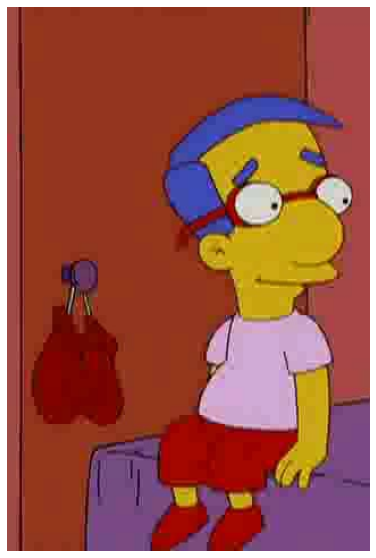

In [21]:
plt.figure(figsize=(10,10))
val = random.randint(0,len(df))
img = cv.imread(df['loc'].iloc[val])
img = cv.cvtColor(img,cv.COLOR_RGB2BGR)
plt.imshow(img)
plt.axis('off')
plt.show()

# Create Labels Dict

In [22]:
#7
categories = df['character_name'].unique()
labels = {}
for category in categories:
    labels[category] = list(categories).index(category)
labels

{'abraham grampa simpson': 0,
 'agnes skinner': 1,
 'apu nahasapeemapetilon': 2,
 'barney gumble': 3,
 'bart simpson': 4,
 'carl carlson': 5,
 'charles montgomery burns': 6,
 'chief wiggum': 7,
 'cletus spuckler': 8,
 'comic book guy': 9,
 'disco stu': 10,
 'edna krabappel': 11,
 'fat tony': 12,
 'gil': 13,
 'groundskeeper willie': 14,
 'homer simpson': 15,
 'kent brockman': 16,
 'krusty the clown': 17,
 'lenny leonard': 18,
 'lionel hutz': 19,
 'lisa simpson': 20,
 'maggie simpson': 21,
 'marge simpson': 22,
 'martin prince': 23,
 'mayor quimby': 24,
 'milhouse van houten': 25,
 'miss hoover': 26,
 'moe szyslak': 27,
 'ned flanders': 28,
 'nelson muntz': 29,
 'otto mann': 30,
 'patty bouvier': 31,
 'principal skinner': 32,
 'professor john frink': 33,
 'rainier wolfcastle': 34,
 'ralph wiggum': 35,
 'selma bouvier': 36,
 'sideshow bob': 37,
 'sideshow mel': 38,
 'snake jailbird': 39,
 'troy mcclure': 40,
 'waylon smithers': 41}

# Create Image Array From DataFrame and Scale Array

In [26]:
def create_training_data(df):
    X = []
    y = []
    df = df.copy()
    df = df.sample(frac=1,random_state=1)
    df.reset_index(drop=True,inplace=True)
    for img_dir in df.loc[:,'loc']:
        try:
            class_num = labels[df.loc[df['loc']==img_dir,'character_name'].iloc[0]]
            img = cv.imread(img_dir)
            new_img = cv.resize(img,(img_size_x,img_size_y))
            X.append(new_img)
            y.append(class_num)
        except Exception as ex:
            pass
    return X,y

In [27]:
X,y = create_training_data(df=df)

In [28]:
X = np.array(X,dtype=np.float32).reshape(-1,img_size_x,img_size_y,3)
y = np.array(y).astype(X.dtype)

In [29]:
X = X/255.

In [30]:
y = to_categorical(y,len(labels))

# Save X and y variable to pickle files

In [31]:
pickle_out = open(os.path.join(paths['variable_path'],'X.pickle'),'wb')
pickle.dump(X,pickle_out)
pickle_out = pickle_out.close()

pickle_out = open(os.path.join(paths['variable_path'],'y.pickle'),'wb')
pickle.dump(y,pickle_out)
pickle_out = pickle_out.close()

In [32]:
pickle_in = open(os.path.join(paths['variable_path'],'X.pickle'),'rb')
X = pickle.load(pickle_in)

pickle_in = open(os.path.join(paths['variable_path'],'y.pickle'),'rb')
y = pickle.load(pickle_in)

# Create Model

In [33]:
#
def create_model():    
    model = tf.keras.Sequential()

    model.add(Conv2D(64,(3,3),input_shape=(100,100,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(128,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))


    model.add(Conv2D(128,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))          

    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(64))

    model.add(Dropout(0.5))
    model.add(Dense(42))
    
    model.add(Activation('softmax'))


    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer='adam',
                 metrics=['accuracy'])

    return model

In [34]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=1,shuffle=True)

In [35]:
checkpoint_path = os.path.join(paths['checkpoint_path'],'cp-{epoch:04d}.ckpt')

In [36]:
batch_size=32

In [37]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,save_freq=3*(X_train.shape[0]//batch_size))

In [38]:
y.shape

(20933, 42)

# Data Augmention and Fit model

In [39]:
model = create_model()
aug = ImageDataGenerator(rotation_range=25,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,horizontal_flip=True)
model.save_weights(checkpoint_path.format(epoch=0))
aug.fit(X_train)
history = model.fit(aug.flow(X_train,y_train,batch_size=batch_size),
                     validation_data=(X_val,y_val),
                    steps_per_epoch=X_train.shape[0]//batch_size,
                     epochs=15,
                     callbacks=[cp_callback])

Epoch 1/15
523/523 [==============================] - 41s 68ms/step - loss: 3.0844 - accuracy: 0.1351 - val_loss: 2.4839 - val_accuracy: 0.3413
Epoch 2/15
523/523 [==============================] - 35s 66ms/step - loss: 2.3556 - accuracy: 0.3559 - val_loss: 1.7393 - val_accuracy: 0.5300
Epoch 3/15
523/523 [==============================] - 36s 69ms/step - loss: 1.8188 - accuracy: 0.5116 - val_loss: 1.2550 - val_accuracy: 0.6503
Epoch 4/15
523/523 [==============================] - 37s 71ms/step - loss: 1.4744 - accuracy: 0.6046 - val_loss: 1.0311 - val_accuracy: 0.7038
Epoch 5/15
523/523 [==============================] - 36s 69ms/step - loss: 1.2465 - accuracy: 0.6672 - val_loss: 0.8959 - val_accuracy: 0.7566
Epoch 6/15
523/523 [==============================] - 36s 70ms/step - loss: 1.1188 - accuracy: 0.7005 - val_loss: 0.8160 - val_accuracy: 0.7850
Epoch 7/15
523/523 [==============================] - 36s 69ms/step - loss: 1.0092 - accuracy: 0.7230 - val_loss: 0.7573 - val_accuracy:

In [40]:
# Save History File
pickle_out = open(os.path.join(paths['variable_path'],'history.pickle'),'wb')
pickle.dump(history.history,pickle_out)
pickle_out = pickle_out.close()

In [41]:
pickle_in = open(os.path.join(paths['variable_path'],'history.pickle'),'rb')
history = pickle.load(pickle_in)

In [42]:
model = create_model()
model.load_weights(os.path.join(paths['checkpoint_path'],'cp-0015.ckpt'))

## Plot Model Accuracy

In [43]:
history_df= pd.DataFrame(history)


fig = px.line(history_df[['accuracy','val_accuracy']],labels={'index':'Epoch',
                                                        'value':'Accuracy',
                                                        'variable':'Metrics'})

metrics = ['Training Accuracy','Validation Accuracy']
for idx,name in enumerate(metrics):
    fig.data[idx].name=name
fig.update_layout(title='<b>Model Accuracy<b>',title_x = 0.5)   

fig.show()



## Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix
val_preds = model.predict(X_val).argmax(axis=1)


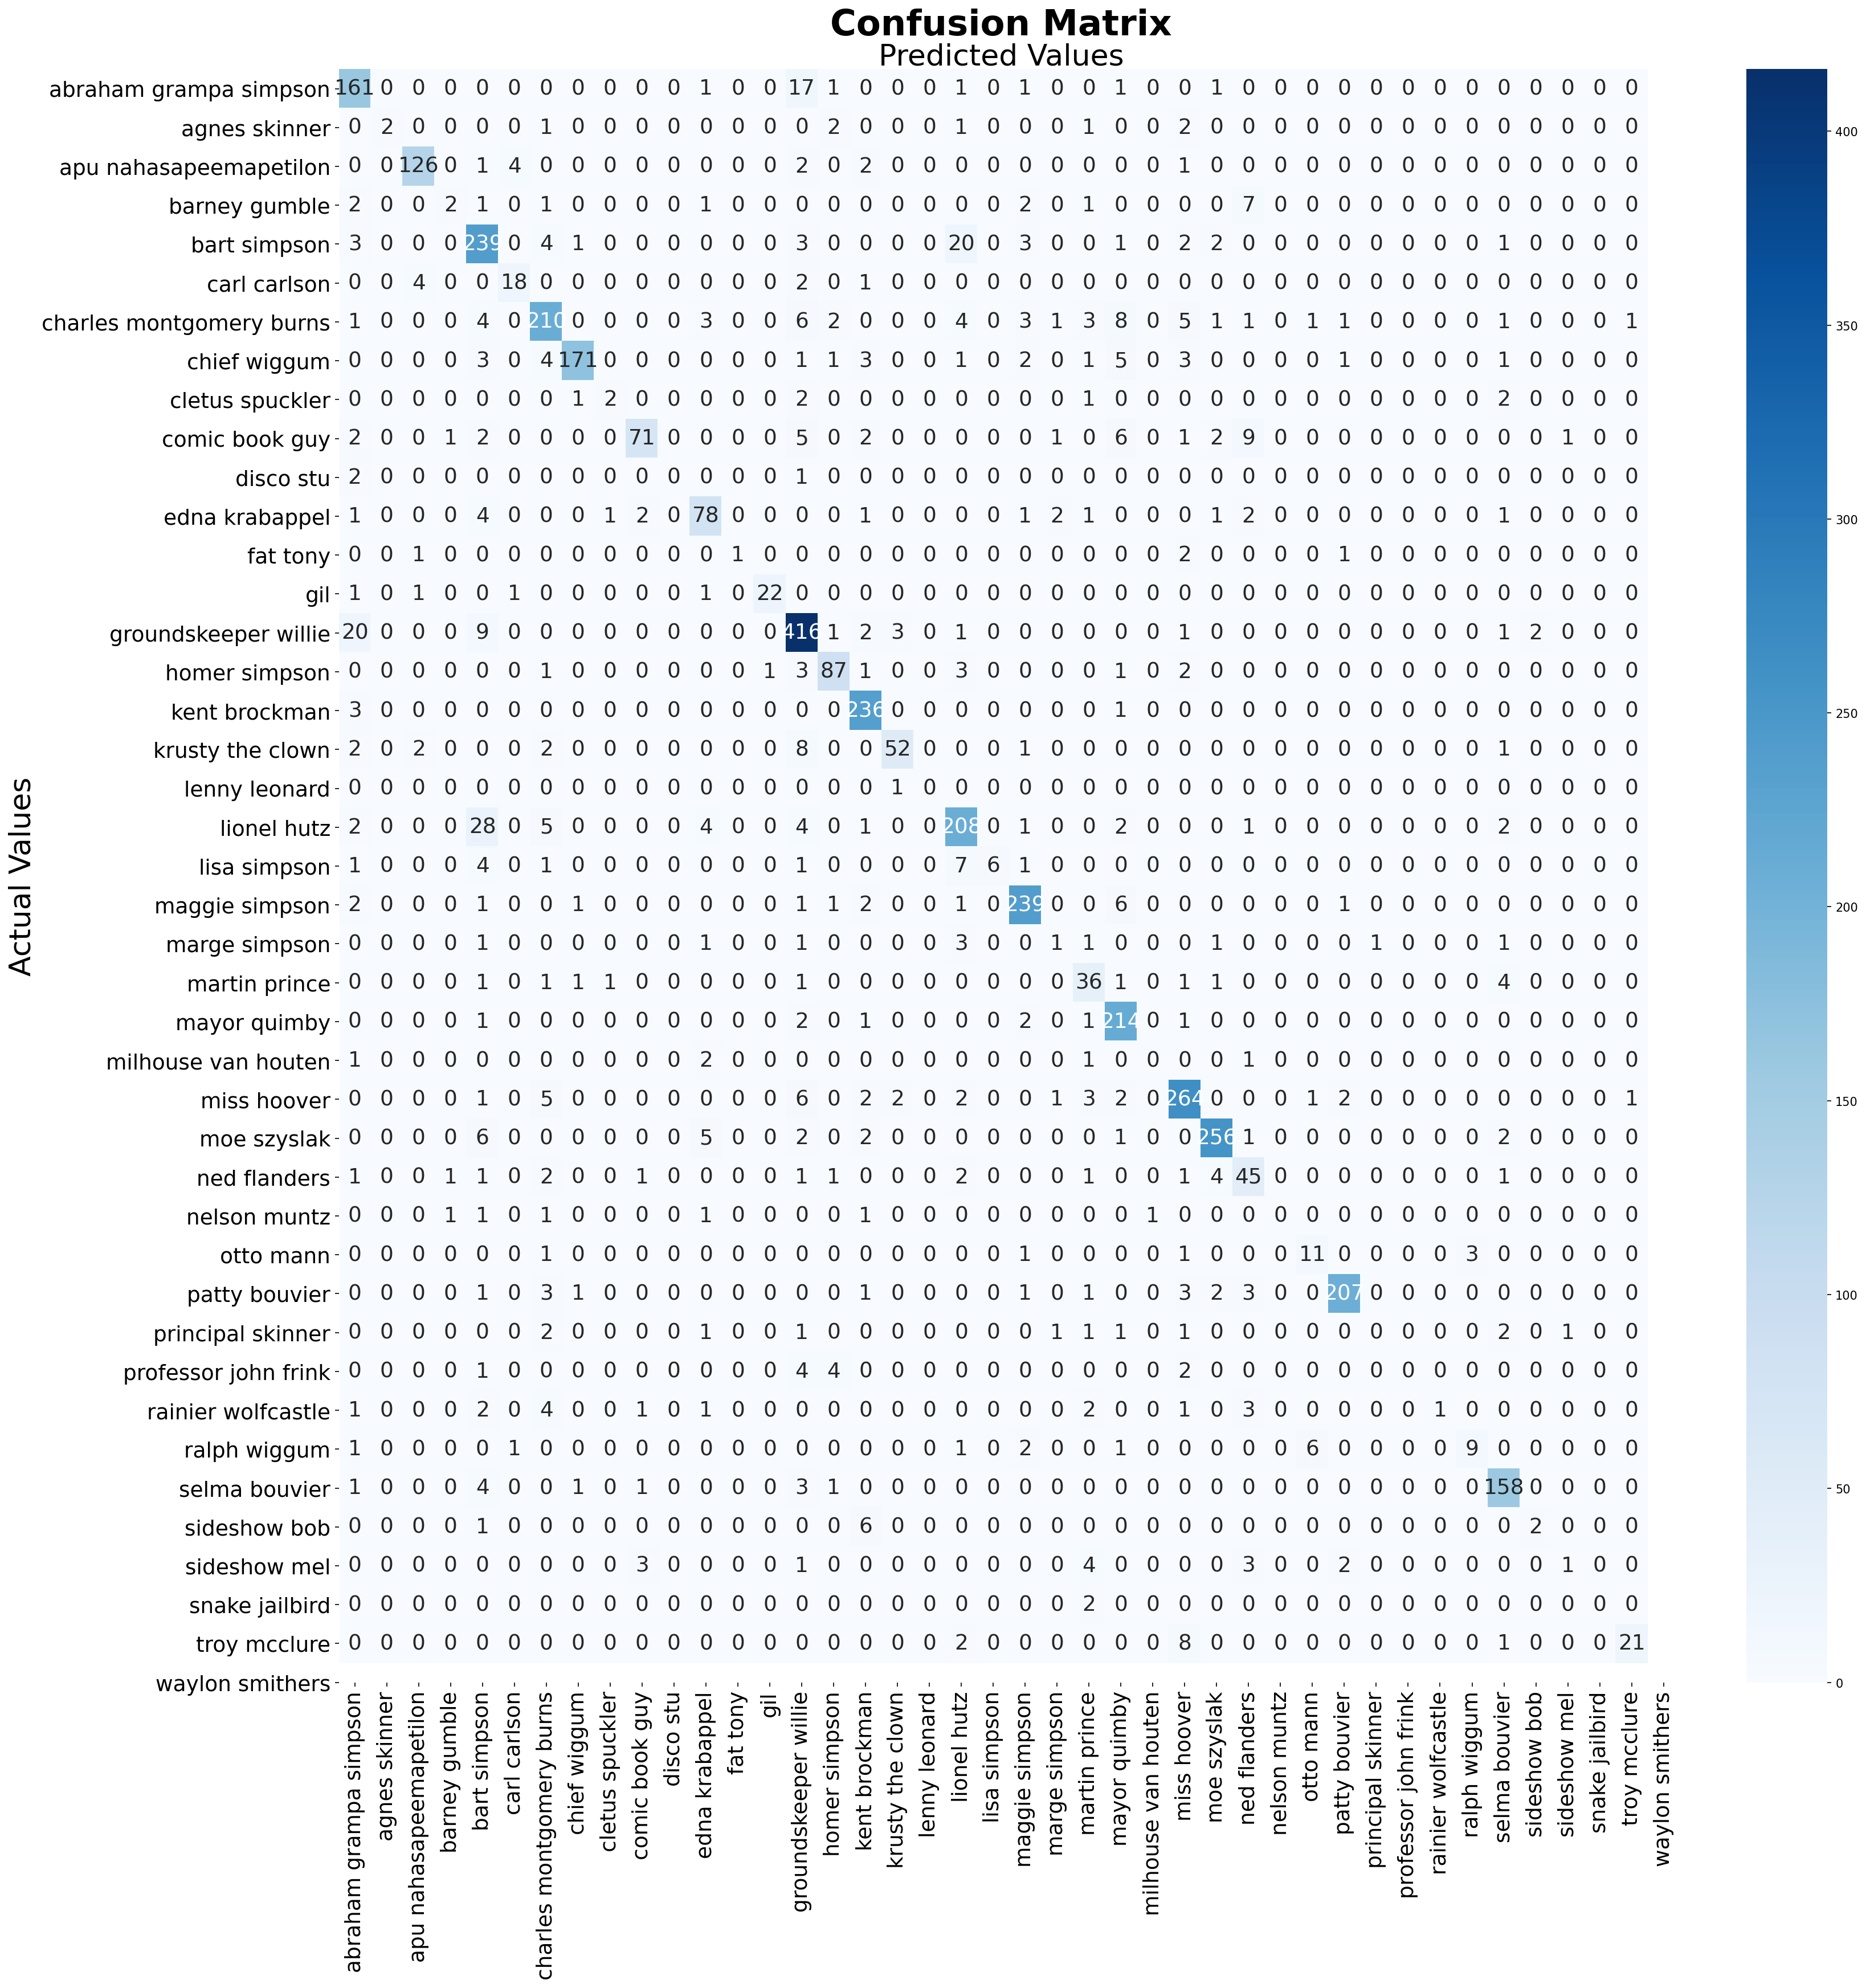

In [45]:
conf_mat = confusion_matrix(np.where(y_val>0)[1],val_preds)
plt.figure(figsize=(25,25),dpi=150)
ax = sns.heatmap(conf_mat,annot=True,
                     xticklabels=labels.keys(),
                     yticklabels=labels.keys(),
                     cmap='Blues',
                     annot_kws={'size':18},
                    fmt='.0f')

ax.set_xticklabels(labels=labels.keys(),fontdict={'fontsize':18})
ax.set_yticklabels(labels=labels.keys(),fontdict={'fontsize':18})
ax.set_title('Confusion Matrix',fontdict={'fontsize':30,'fontweight':'bold'})
ax.set_xlabel('Predicted Values',fontdict={'fontsize':25})
ax.set_ylabel('Actual Values',fontdict={'fontsize':25})
ax.xaxis.set_label_position('top')
plt.show()

# ROC AUC Curve and Parameter Tuning

In [46]:
from sklearn.metrics import roc_curve,auc,roc_auc_score,classification_report

In [47]:
print(classification_report(np.where(y_val>0)[1],val_preds))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       184
           1       1.00      0.22      0.36         9
           2       0.94      0.93      0.93       136
           3       0.40      0.12      0.18        17
           4       0.75      0.86      0.80       279
           5       0.75      0.72      0.73        25
           6       0.85      0.82      0.83       256
           7       0.97      0.87      0.91       197
           8       0.50      0.25      0.33         8
           9       0.90      0.69      0.78       103
          10       0.00      0.00      0.00         3
          11       0.79      0.82      0.80        95
          12       1.00      0.20      0.33         5
          14       0.96      0.85      0.90        26
          15       0.84      0.91      0.88       456
          16       0.86      0.88      0.87        99
          17       0.89      0.98      0.94       240
          18       0.90    

c:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [48]:
val_score = model.predict(X_val)

In [49]:
y_pred = model.predict(X_val, verbose=0)
comp = np.argmax(y_val, axis=1) == np.argmax(y_pred, axis=1)
index_good, index_false = [i for i, x in enumerate(comp) if x], [i for i, x in enumerate(comp) if not x]

In [50]:
labels_test = ['']
test_size=990
test_df = create_df(labels=labels_test,path=paths['test_path'])
test_df.drop('character',axis=1,inplace=True)

In [51]:
def create_test_data(df):
    test_data = []
    df = df.copy()
    for img_dir in df.loc[:,'loc']:
        try:
            img = cv.imread(img_dir)
            new_img = cv.resize(img,(100,100))
            test_data.append([new_img])
        except Exception as ex:
            print(ex)
            pass
    test_data = np.array(test_data,dtype=np.float32)
    return test_data/255.

In [52]:
test_data = create_test_data(df=test_df)
test_data = test_data.reshape(-1,100,100,3)

In [53]:
import re
y_dirs = [os.path.splitext(i)[0] for i in os.listdir(paths['test_path'])]
y_true = []
for text in y_dirs:
    search = re.search('(\w+)(_\d+)',text)
    y_true.append(' '.join(search.group(1).split('_')))
test_df['character'] = y_true
for idx,character in enumerate(y_true):
    y_true[idx] = labels[character]

In [54]:
preds = model.predict(test_data)
preds = preds.argmax(axis=1)

In [55]:
acc_test = (preds==y_true).sum()/test_size
print(f"Test Accuracy:{acc_test*100:.2f}%")

Test Accuracy:89.19%


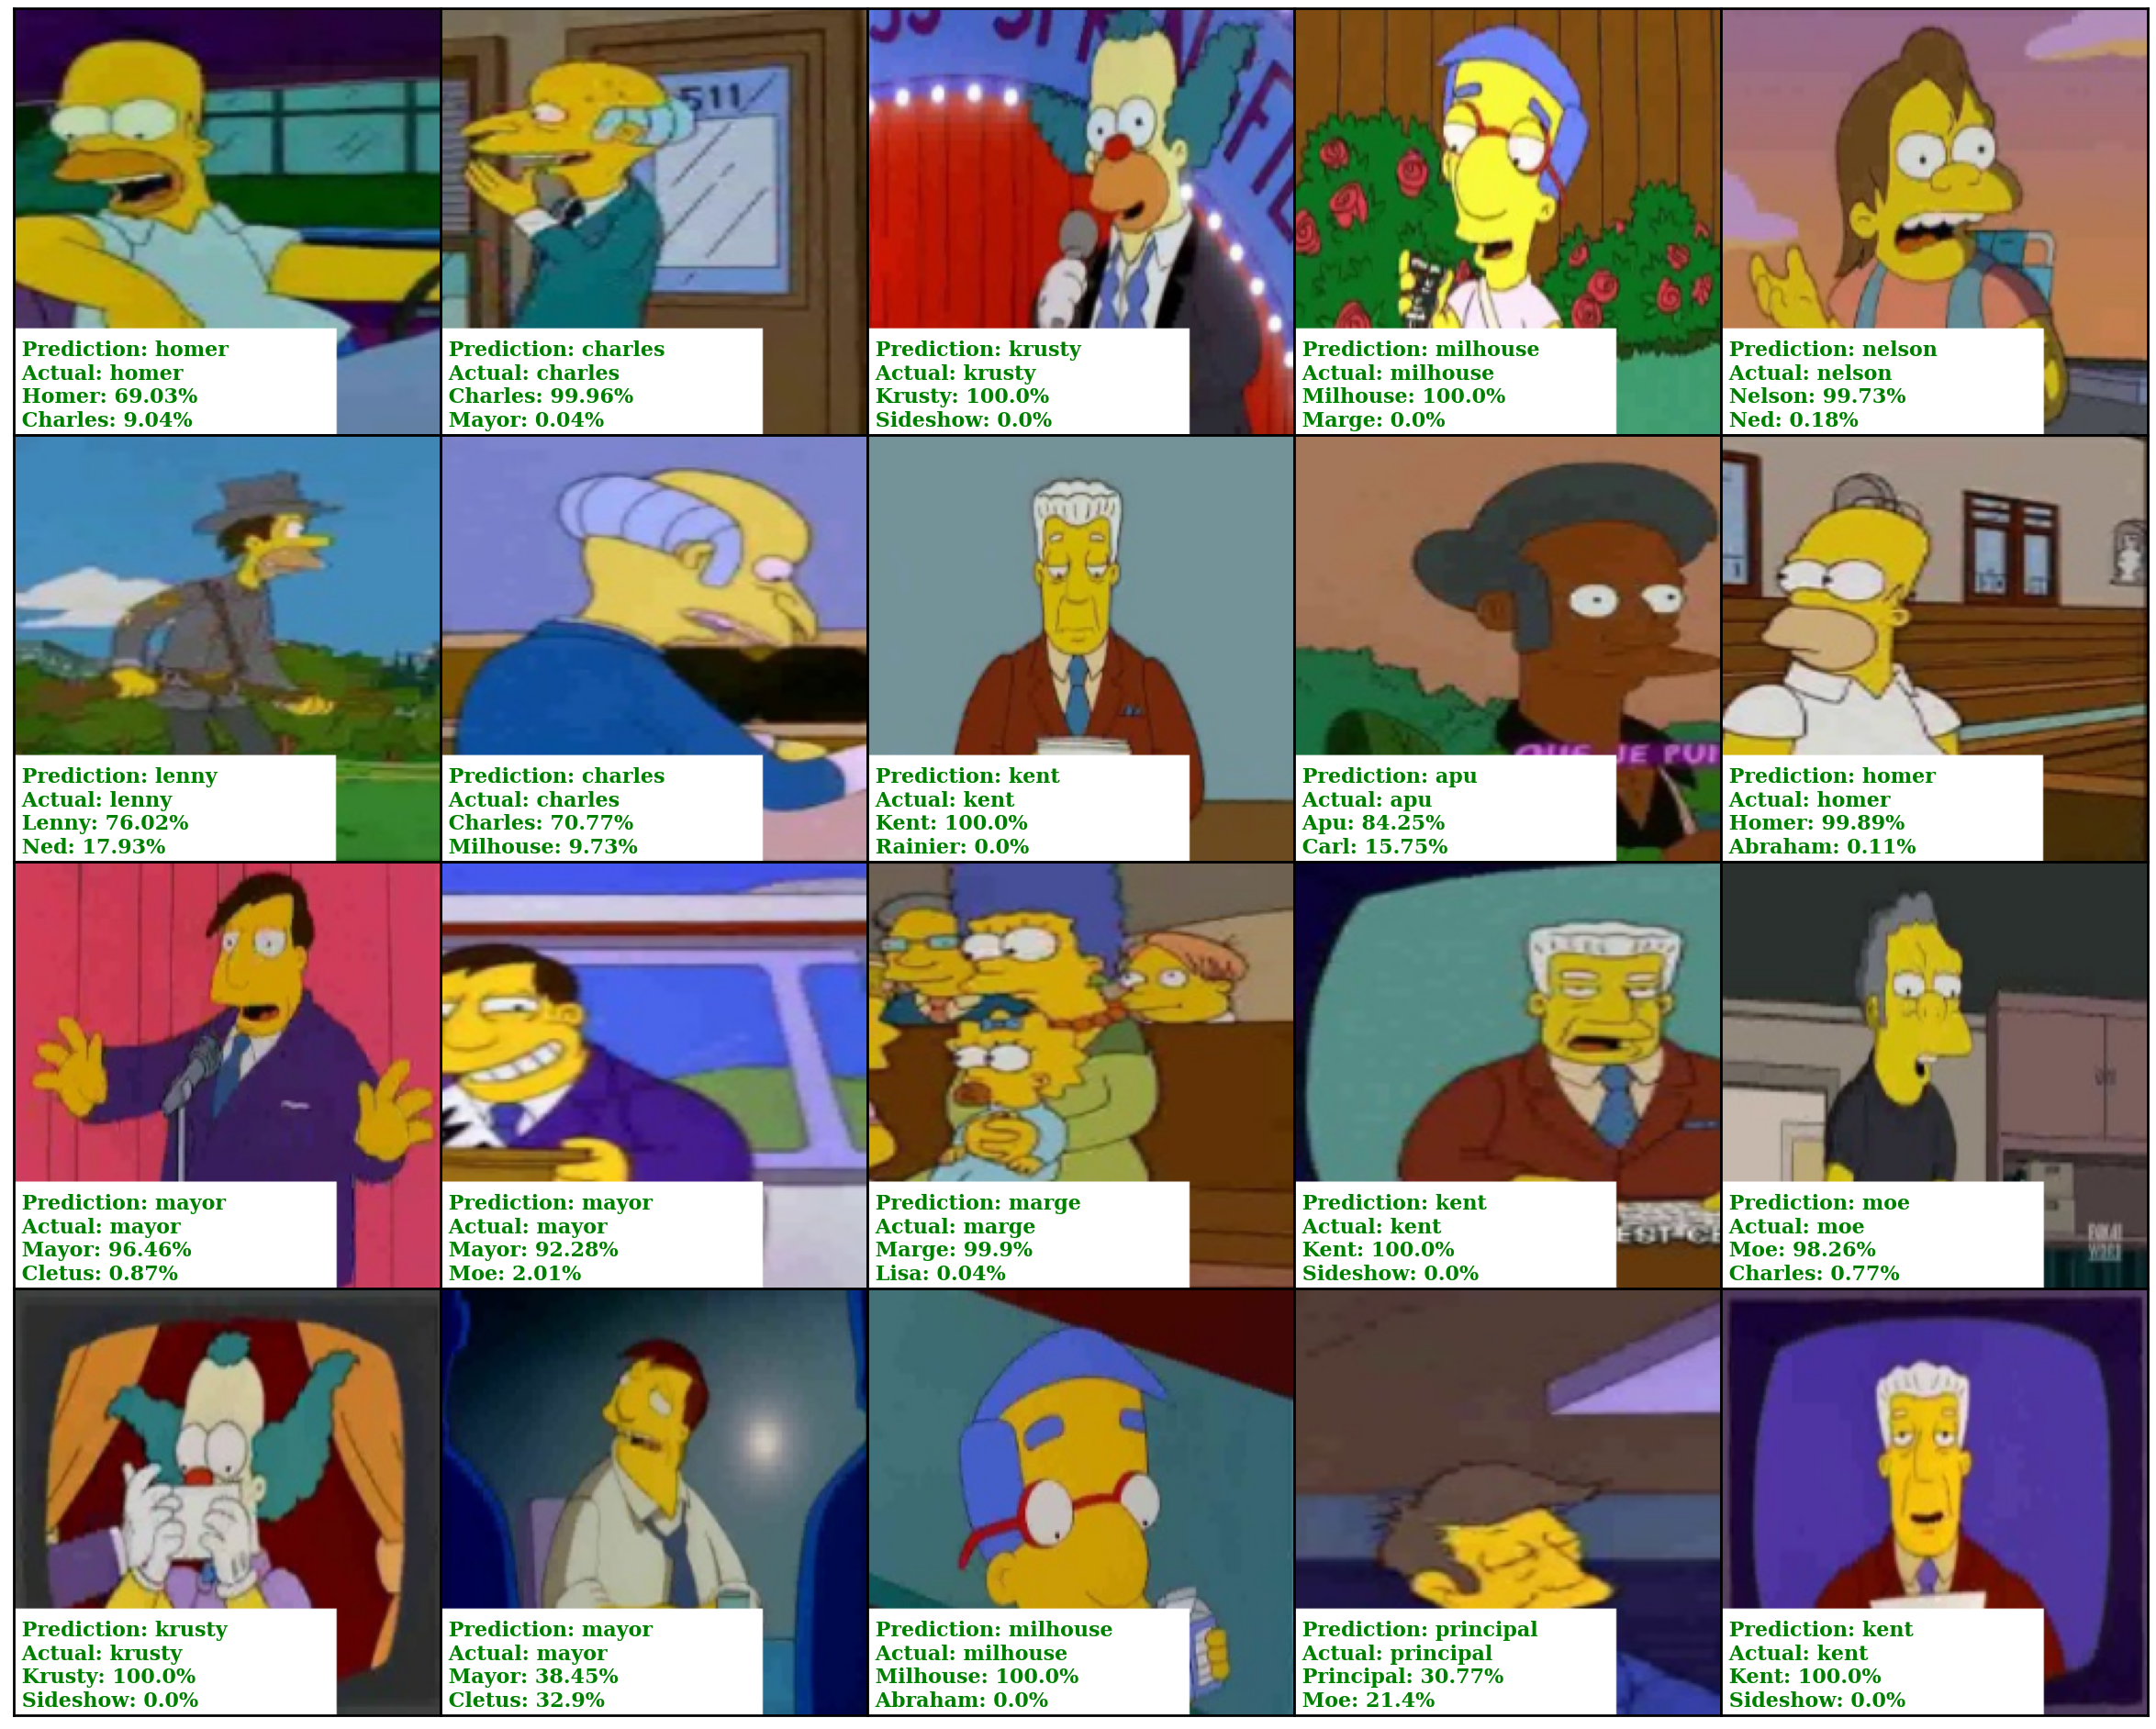

In [59]:
import re
import matplotlib.gridspec as gridspec
def image_generator(img_path):    
    image_quantity = 1
    fig,axs = plt.subplots(4,5,figsize=(30,30),dpi=100)

    
    
    for i,ax in enumerate(axs.flat):
        random_img = np.random.choice(os.listdir(img_path))
        img = cv.imread(os.path.join(img_path,random_img))
        img = cv.resize(img,(200,200))
        
        
        new_img = cv.resize(img,(100,100)).astype('float32')/255.
        new_img = new_img.reshape(1,100,100,3)
        
        
        pred_idx = model.predict(new_img).argmax(axis=1)
        pred_name = list(labels.keys())[int(pred_idx)]
        pred_name_text = pred_name.split(' ')[0]
        

        search = re.search('(\w+)(_\d+)',random_img)
        act_name= (' '.join(search.group(1).split('_')))
        act_name_text = (search.group(1).split('_'))[0]
        
    
        ratios_idx = np.argsort(model.predict(new_img))[0][-2:]
        ratios = sorted(model.predict(new_img)[0])[-2:]
        ratios_names = list(map(list(labels.keys()).__getitem__,ratios_idx))
        ratios_names = [i.split(' ')[0] for i in ratios_names]

        img = cv.cvtColor(img,cv.COLOR_RGB2BGR)
        Text = " Prediction: {}\n Actual: {}\n {}: {}%\n {}: {}%".format\
        (pred_name_text,act_name_text,ratios_names[-1].capitalize(),
         round(ratios[-1]*100,2),ratios_names[-2].capitalize(),round(ratios[-2]*100,2))

                
        cv.rectangle(img,(0,150),(150,200),(255,255,255), -1)

        
        ax.text(0,195,Text,fontdict={'fontfamily':'serif','fontsize':16,
                                    'fontweight':'bold',
                                    'color':'g' if act_name==pred_name else 'r'})
        
        ax.imshow(img)
        
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        ax.set_xticks([])
        ax.set_yticks([])
    fig.subplots_adjust(wspace=0,hspace=0,bottom=0.26)

        
image_generator(img_path=paths['test_path'])

In [63]:
m,s = 15,30

cap = cv.VideoCapture('E:\works\python\simpson_character_recognition\simpson_video.mp4')

fps = cap.get(cv.CAP_PROP_FPS)
cap.set(1,fps*(m*60+s))

if (cap.isOpened()==False):
    print('Error opening video file')
    
while(cap.isOpened()):
    ret,frame = cap.read()
    
    
    new_img = cv.resize(frame,(100,100)).astype('float32')/255.
    new_img = new_img.reshape(-1,100,100,3)
    
    pred = model.predict(new_img)
    
    pred_idx = pred.argmax(axis=1)
    pred_name = list(labels.keys())[int(pred_idx)]
    pred_name_text = pred_name.split(' ')[0]
    
    ratios_idx = np.argsort(pred)[0][-2:]
    ratios = sorted(pred[0])[-2:]
    ratios_names = list(map(list(labels.keys()).__getitem__,ratios_idx))

    
    Text = f" Prediction: {pred_name_text if ratios[-1]>0.5 else ''}"
    Text1 = f" {ratios_names[-1].capitalize()}: {round(ratios[-1]*100,2) if ratios[-1]>0.5 else ''}%"
    Text2 = f" {ratios_names[-2].capitalize()}: {round(ratios[-2]*100,2)}%"
    Texts = [Text2,Text1,Text]


    cv.rectangle(frame,(0,145),(475,205),(255,255,255), -1)

    font = cv.FONT_HERSHEY_COMPLEX

    
    for idx,text in enumerate(Texts):
        cv.putText(frame,text,(0,200-(idx*18)),font,0.7,(0,0,0),1,cv.LINE_AA)
    
    
    if ret == True:
        cv.imshow('Frame',frame)
    
    
    if cv.waitKey(1) & 0xFF == ord("q"): 
        break

        

cap.release()
cv.destroyAllWindows()
